<a href="https://colab.research.google.com/github/Shobhit2000/Hand_Tracker/blob/master/train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Clone Repo**

In [0]:
! git clone https://github.com/Shobhit2000/Hand_Tracker.git

Cloning into 'Hand_Tracker'...
remote: Enumerating objects: 4811, done.
remote: Total 4811 (delta 0), reused 0 (delta 0), pack-reused 4811
Receiving objects: 100% (4811/4811), 287.41 MiB | 68.41 MiB/s, done.
Resolving deltas: 100% (1/1), done.


**IMPORTS**

In [0]:
import cv2
import os
import numpy as np
import csv
from skimage import io
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense, Conv2D, Input, Flatten, Reshape, Conv2DTranspose, Dropout, MaxPooling2D
from keras.models import Model
from keras.callbacks import ReduceLROnPlateau
from keras import backend as K

Using TensorFlow backend.


**Initialize Paths**

In [0]:
x_train = []
x_test = []
y_train = []
y_test = []

train_path = "Hand_Tracker//dataset//train//"
test_path = "Hand_Tracker//dataset//test//"

img_dim_x = 360
img_dim_y = 640
output_dim = 8

**Create the Train folder**

[[323, 226, 412, 276, 257, 215, 311, 272], [348, 239, 428, 282, 216, 230, 277, 356], [365, 203, 456, 260, 295, 187, 359, 248], [326, 211, 412, 263, 263, 197, 323, 256], [305, 216, 392, 271, 219, 193, 300, 260], [293, 222, 389, 278, 222, 197, 295, 270], [308, 222, 400, 282, 228, 197, 307, 272], [328, 230, 423, 284, 258, 193, 330, 265], [324, 226, 418, 278, 255, 192, 328, 261], [319, 219, 412, 274, 238, 181, 298, 244], [324, 218, 415, 265, 259, 197, 318, 259], [333, 201, 428, 256, 273, 191, 334, 256], [322, 208, 411, 261, 256, 192, 316, 256], [329, 214, 416, 264, 242, 185, 306, 249], [332, 228, 416, 278, 241, 193, 307, 262], [336, 230, 426, 286, 258, 193, 332, 262], [323, 214, 413, 268, 255, 189, 314, 251], [322, 214, 409, 266, 251, 185, 319, 254], [315, 177, 409, 226, 255, 155, 315, 216], [313, 181, 398, 240, 230, 203, 297, 333], [321, 176, 416, 229, 253, 159, 322, 224], [293, 190, 382, 241, 218, 168, 292, 233], [287, 193, 373, 244, 210, 170, 286, 234], [311, 181, 396, 238, 248, 168, 31

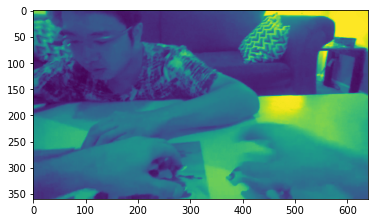

In [0]:
for root, dirs, filename in os.walk(train_path):
    for x in filename:
        if x == 'annotations.csv':
            with open(os.path.join(train_path, 'annotations.csv'), 'r') as f:
                csv_reader = csv.reader(f)
                for row in csv_reader:
                  for i in range(len(row)):
                    if row[i].find('.') != -1:
                      row[i] = int(row[i][:row[i].find('.')])
                    else:
                      row[i] = int(row[i])
                  y_train.append(row)
        else:
            img = io.imread(os.path.join(train_path, x), as_gray=True)
            img = img / 255
            img = np.asarray(img)
            x_train.append(img)

print(y_train)
plt.imshow(x_train[1])
plt.show()

**Create the Test folder**

[[289, 80, 359, 136, 203, 84, 270, 144], [196, 89, 274, 163, 19, 107, 114, 197], [185, 90, 293, 159, 73, 95, 163, 171], [270, 57, 345, 124, 156, 61, 225, 129], [338, 54, 414, 130, 172, 31, 261, 90], [358, 66, 428, 165, 218, 65, 325, 143], [329, 53, 407, 121, 240, 94, 365, 202], [327, 62, 392, 130, 216, 76, 335, 153], [319, 47, 395, 119, 188, 47, 288, 114], [406, 80, 499, 199, 224, 83, 356, 193], [357, 61, 467, 159, 191, 55, 304, 174], [349, 78, 438, 179, 173, 70, 274, 205], [341, 53, 438, 171, 115, 67, 233, 185], [279, 33, 334, 104, 130, 69, 232, 182], [325, 16, 378, 84, 185, 22, 281, 86], [290, 97, 393, 203, 177, 58, 285, 140], [410, 96, 513, 204, 257, 66, 367, 174], [422, 89, 525, 193, 285, 78, 403, 191], [438, 71, 532, 187, 299, 84, 435, 194], [456, 76, 559, 167, 340, 106, 485, 237], [387, 71, 458, 198, 136, 25, 235, 116], [307, 2, 422, 54, 170, 3, 249, 35], [464, 11, 538, 85, 267, 1, 368, 49], [366, 17, 446, 72, 264, 4, 355, 44], [434, 13, 494, 65, 287, 20, 374, 89], [402, 9, 461, 

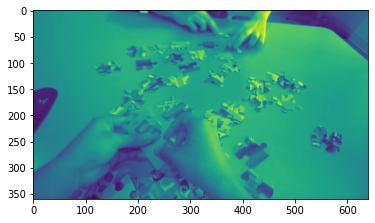

In [0]:
for root, dirs, filename in os.walk(test_path):
    for x in filename:
        if x == 'test_annotations.csv':
            with open(os.path.join(test_path, 'test_annotations.csv'), 'r') as f:
                csv_reader = csv.reader(f)
                for row in csv_reader:
                  for i in range(len(row)):
                    if row[i].find('.') != -1:
                      row[i] = int(row[i][:row[i].find('.')])
                    else:
                      row[i] = int(row[i])
                  y_test.append(row)
        else:
            img = io.imread(os.path.join(test_path, x), as_gray=True)
            img = img / 255
            img = np.asarray(img)
            x_test.append(img)

print(y_test)
# te = cv2.cvtColor(x_test[1], cv2.COLOR_BGR2RGB)
plt.imshow(x_test[1])
plt.show()

In [0]:
x_train = np.asarray(x_train)
x_test = np.asarray(x_test)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4700, 360, 640)
(4700, 8)
(100, 360, 640)
(100, 8)


In [0]:
x_train = x_train.reshape(x_train.shape[0], img_dim_x, img_dim_y, 1)
x_test = x_test.reshape(x_test.shape[0], img_dim_x, img_dim_y, 1)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4700, 360, 640, 1)
(4700, 8)
(100, 360, 640, 1)
(100, 8)


**Model Architecture**

In [0]:
inputs = Input(shape=(img_dim_x, img_dim_y, 1), name='Hand_Tracker_Model')

x = Conv2D(64, (3, 3), strides=1, padding='same', activation='relu')(inputs)
x = MaxPooling2D(pool_size=(2, 2), strides=2)(x)

x = Conv2D(128, (3, 3), strides=1, padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2), strides=2)(x)

x = Conv2D(256, (3, 3), strides=1, padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2), strides=2)(x)

x = Conv2D(512, (3, 3), strides=1, padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2), strides=2)(x)

x = Conv2D(512, (3, 3), strides=1, padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2), strides=2)(x)

shape = K.int_shape(x)
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(256, activation='relu')(x)
coordinates = Dense(output_dim, activation='relu', name='img_coordinates')(x)

Tracker_Model = Model(inputs, coordinates, name='Hand_Tracker_Model')
Tracker_Model.summary()

Model: "Hand_Tracker_Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hand_Tracker_Model (InputLay (None, 360, 640, 1)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 360, 640, 64)      640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 180, 320, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 180, 320, 128)     73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 90, 160, 128)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 90, 160, 256)      295168    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 45, 80, 256)

In [0]:
lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1), cooldown=0, patience=5, verbose=1, min_lr=0.05)
Tracker_Model.compile(loss='mse', optimizer='Adam', metrics=['accuracy'])

In [0]:
Tracker_Model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=30, batch_size=47, shuffle=True)

Train on 4700 samples, validate on 100 samples
Epoch 1/30
4700/4700 [==============================] - 805s 171ms/step - loss: 18878.5755 - accuracy: 0.8230 - val_loss: 8585.6549 - val_accuracy: 0.9800
Epoch 2/30
4700/4700 [==============================] - 794s 169ms/step - loss: 13318.5816 - accuracy: 0.9251 - val_loss: 9306.9763 - val_accuracy: 0.9800
Epoch 3/30
1645/4700 [=========>....................] - ETA: 8:37 - loss: 13201.1172 - accuracy: 0.9252

In [0]:
Tracker_Model.save("Tracker_Model.h5")

In [0]:
from google.colab import files
files.download('Tracker_Model.h5')

----------------------------------------
Exception happened during processing of request from ('::ffff:127.0.0.1', 60970, 0, 0)
Traceback (most recent call last):
  File "/usr/lib/python3.6/socketserver.py", line 320, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 351, in process_request
    self.finish_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 364, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/lib/python3.6/socketserver.py", line 724, in __init__
    self.handle()
  File "/usr/lib/python3.6/http/server.py", line 418, in handle
    self.handle_one_request()
  File "/usr/lib/python3.6/http/server.py", line 406, in handle_one_request
    method()
  File "/usr/lib/python3.6/http/server.py", line 639, in do_GET
    self.copyfile(f, self.wfile)
  File "/usr/lib/python3.6/http/server.py", line 800, in copyfile
    shutil.copyfil